In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(x_test, y_test))

Epoch 1/50


469/469 [==============================] - 37s 77ms/step - loss: 0.2339 - accuracy: 0.9290 - val_loss: 0.0608 - val_accuracy: 0.9802
Epoch 2/50
469/469 [==============================] - 34s 72ms/step - loss: 0.0845 - accuracy: 0.9756 - val_loss: 0.0405 - val_accuracy: 0.9866
Epoch 3/50
469/469 [==============================] - 33s 70ms/step - loss: 0.0606 - accuracy: 0.9812 - val_loss: 0.0337 - val_accuracy: 0.9896
Epoch 4/50
469/469 [==============================] - 36s 77ms/step - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.0291 - val_accuracy: 0.9903
Epoch 5/50
469/469 [==============================] - 36s 77ms/step - loss: 0.0444 - accuracy: 0.9857 - val_loss: 0.0295 - val_accuracy: 0.9893
Epoch 6/50
469/469 [==============================] - 37s 79ms/step - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.0321 - val_accuracy: 0.9913
Epoch 7/50
469/469 [==============================] - 37s 78ms/step - loss: 0.0343 - accuracy: 0.9892 - val_loss: 0.0326 - val_accurac

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03755969554185867
Test accuracy: 0.9937000274658203


In [10]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.utils import to_categorical

In [11]:
y_test_classes = np.argmax(y_test, axis=1)
y_pred_probabilities = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probabilities, axis=-1)

313/313 [==============================] - 2s 6ms/step


In [12]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

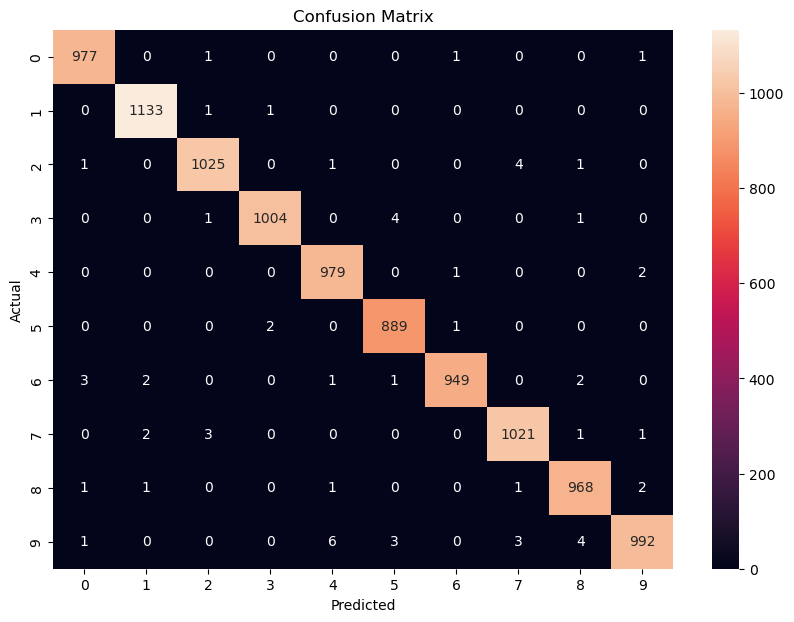

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test_binary = to_categorical(y_test_classes, num_classes=10)
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

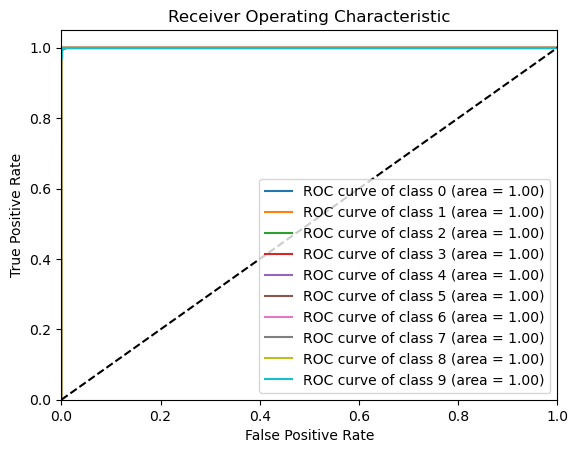

In [15]:
plt.figure()
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()